# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [26]:
X = wine.drop('quality', axis=1)
y = wine.quality

In [27]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=11, stratify=y)
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train).astype(np.int32)
X_test_s = ss.transform(X_test).astype(np.int32)

In [29]:
y_train_c = to_categorical(y_train).astype(np.int32)
y_test_c = to_categorical(y_test).astype(np.int32)

In [30]:
model = Sequential()

n_input = X_train_s.shape[1]

model.add(Dense(n_input, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

By the way, here is a helpful blog post that goes carefully through a list of similarly-named different activation functions and loss functions: https://gombru.github.io/2018/05/23/cross_entropy_loss/

In [32]:
history = model.fit(X_train_s, y_train_c, validation_data=(X_test_s, y_test_c),
                   epochs=30, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/30
4872/4872 [==============================] - 1s 104us/step - loss: 1.8987 - acc: 0.3255 - val_loss: 1.5852 - val_acc: 0.4369
Epoch 2/30
4872/4872 [==============================] - 0s 24us/step - loss: 1.4616 - acc: 0.4454 - val_loss: 1.3551 - val_acc: 0.4597
Epoch 3/30
4872/4872 [==============================] - 0s 23us/step - loss: 1.3124 - acc: 0.4725 - val_loss: 1.2750 - val_acc: 0.4788
Epoch 4/30
4872/4872 [==============================] - 0s 25us/step - loss: 1.2472 - acc: 0.4883 - val_loss: 1.2328 - val_acc: 0.4843
Epoch 5/30
4872/4872 [==============================] - 0s 25us/step - loss: 1.2067 - acc: 0.4967 - val_loss: 1.2053 - val_acc: 0.4917
Epoch 6/30
4872/4872 [==============================] - 0s 25us/step - loss: 1.1804 - acc: 0.5101 - val_loss: 1.1878 - val_acc: 0.5015
Epoch 7/30
4872/4872 [==============================] - 0s 25us/step - loss: 1.1633 - acc: 0.5082 - val_loss: 1.1775 - val_acc: 0.5034
Epoch 

In [33]:
for layer in model.layers:
    print(layer.get_weights())

[array([[-0.14363733,  0.3974387 , -0.12620385,  0.15893246, -0.23006316,
        -0.3813938 , -0.14877374, -0.03906774,  0.09247733,  0.06058184,
        -0.01787888, -0.15392202],
       [-0.18563023,  0.32336417, -0.10309023, -0.1264321 ,  0.7054024 ,
        -0.6795623 , -0.12108346, -0.12921049, -0.540397  ,  0.11866748,
         0.64654857, -0.39910945],
       [ 0.5535992 , -0.5425511 , -0.34652007,  0.14908409, -0.25600818,
         0.54160076,  0.1191568 ,  0.5298681 , -0.09526905,  0.24216197,
        -0.49799737, -0.19283399],
       [ 0.34998974,  0.25052074, -1.2822136 , -0.06976854,  0.07552943,
         0.17465995, -0.22794963, -0.34945056,  0.49444067,  0.27289176,
        -0.69866365, -0.08364519],
       [-0.2280398 ,  0.10836743,  0.10764059, -0.14295608,  0.15216477,
         0.02890367,  0.07918039,  0.07855062, -0.10239424,  0.19845529,
        -0.3486913 , -0.10345978],
       [-0.1344088 , -0.28289574, -0.1270056 ,  0.19416857,  0.5549867 ,
        -0.17009096, 

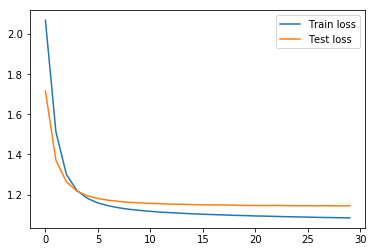

In [11]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

## Adding Regularization

Here's a helpful review article on regularization techniques: https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd

In [12]:
from keras import regularizers

model_r = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_r.add(Dense(n_hidden, input_dim=n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model_r.add(Dense(10, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01)))

model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_r = model_r.fit(X_train_s, y_train_c, validation_data=(X_test_s, y_test_c),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 62us/step - loss: 2.2778 - acc: 0.3007 - val_loss: 1.9777 - val_acc: 0.4055
Epoch 2/42
4872/4872 [==============================] - 0s 25us/step - loss: 1.7765 - acc: 0.4300 - val_loss: 1.6463 - val_acc: 0.4209
Epoch 3/42
4872/4872 [==============================] - 0s 22us/step - loss: 1.5455 - acc: 0.4440 - val_loss: 1.4982 - val_acc: 0.4437
Epoch 4/42
4872/4872 [==============================] - 0s 21us/step - loss: 1.4338 - acc: 0.4678 - val_loss: 1.4196 - val_acc: 0.4628
Epoch 5/42
4872/4872 [==============================] - 0s 21us/step - loss: 1.3696 - acc: 0.4805 - val_loss: 1.3702 - val_acc: 0.4843
Epoch 6/42
4872/4872 [==============================] - 0s 27us/step - loss: 1.3299 - acc: 0.4904 - val_loss: 1.3377 - val_acc: 0.4843
Epoch 7/42
4872/4872 [==============================] - 0s 24us/step - loss: 1.3028 - acc: 0.4875 - val_loss: 1.3172 - val_acc: 0.4892
Epoch 8

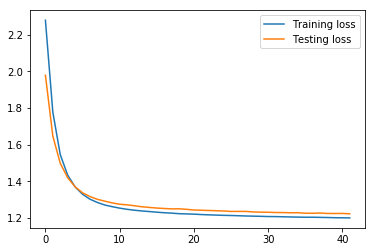

In [13]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

In [14]:
model_r.predict(X_test_s[:5]).round(2)

array([[0.  , 0.  , 0.  , 0.01, 0.06, 0.34, 0.41, 0.14, 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.04, 0.33, 0.46, 0.14, 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.08, 0.66, 0.22, 0.03, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.03, 0.3 , 0.47, 0.15, 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.07, 0.6 , 0.27, 0.04, 0.01, 0.  ]],
      dtype=float32)

In [15]:
y_test_c[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int32)

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [18]:
from keras.layers import Dropout

model_d = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_d.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_d.add(Dropout(rate=0.2))
model_d.add(Dense(10, activation='softmax'))

model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_d = model_d.fit(X_train_s, y_train_c, validation_data=(X_test_s, y_test_c),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 90us/step - loss: 2.2299 - acc: 0.2874 - val_loss: 1.9377 - val_acc: 0.4271
Epoch 2/42
4872/4872 [==============================] - 0s 24us/step - loss: 1.7329 - acc: 0.4409 - val_loss: 1.5316 - val_acc: 0.4535
Epoch 3/42
4872/4872 [==============================] - 0s 23us/step - loss: 1.4544 - acc: 0.4532 - val_loss: 1.3464 - val_acc: 0.4708
Epoch 4/42
4872/4872 [==============================] - 0s 26us/step - loss: 1.3395 - acc: 0.4553 - val_loss: 1.2662 - val_acc: 0.4874
Epoch 5/42
4872/4872 [==============================] - 0s 23us/step - loss: 1.2704 - acc: 0.4797 - val_loss: 1.2229 - val_acc: 0.4905
Epoch 6/42
4872/4872 [==============================] - 0s 25us/step - loss: 1.2244 - acc: 0.4784 - val_loss: 1.1964 - val_acc: 0.4868
Epoch 7/42
4872/4872 [==============================] - 0s 24us/step - loss: 1.2078 - acc: 0.4817 - val_loss: 1.1802 - val_acc: 0.4917
Epoch 8

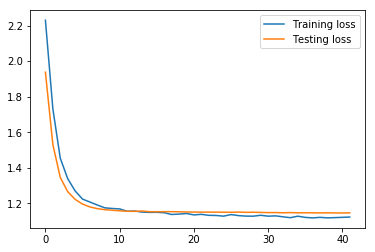

In [19]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [20]:
history_d.history['acc'][-1], history_d.history['val_acc'][-1]

(0.49692118226600984, 0.5070769227834848)

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [21]:
from keras.callbacks import EarlyStopping

In [22]:
from keras.callbacks import EarlyStopping

model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(10, activation='softmax'))

model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, y_train_c, validation_data=(X_test_s, y_test_c),
                         epochs=20, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/20
4872/4872 [==============================] - 0s 89us/step - loss: 2.1922 - acc: 0.2182 - val_loss: 1.8445 - val_acc: 0.3662
Epoch 2/20
4872/4872 [==============================] - 0s 24us/step - loss: 1.5913 - acc: 0.4130 - val_loss: 1.4144 - val_acc: 0.4332
Epoch 3/20
4872/4872 [==============================] - 0s 23us/step - loss: 1.3170 - acc: 0.4555 - val_loss: 1.2813 - val_acc: 0.4578
Epoch 4/20
4872/4872 [==============================] - 0s 24us/step - loss: 1.2286 - acc: 0.4797 - val_loss: 1.2335 - val_acc: 0.4677
Epoch 5/20
4872/4872 [==============================] - 0s 22us/step - loss: 1.1903 - acc: 0.4943 - val_loss: 1.2091 - val_acc: 0.4806
Epoch 6/20
4872/4872 [==============================] - 0s 23us/step - loss: 1.1699 - acc: 0.4961 - val_loss: 1.1956 - val_acc: 0.4849
Epoch 7/20
4872/4872 [==============================] - 0s 22us/step - loss: 1.1558 - acc: 0.4969 - val_loss: 1.1864 - val_acc: 0.4880
Epoch 8

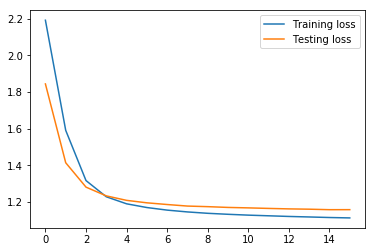

In [23]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();